# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp=pd.read_csv('Temp_States.csv')

#### Print `temp`

In [4]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
temp.describe()

,Temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


In [6]:
temp.info()
# Tenemos datos de temperaturas de 7 ciudades de 3 estados distintos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [7]:
temp.columns=[e.lower().replace(' ', '_') for e in temp.columns]

#### Select the rows where state is New York

In [8]:
temp_state_newyork = temp [temp.state=='New York']
temp_state_newyork

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [9]:
temp_state_newyork.mean()


C:\Users\carlo\AppData\Local\Temp\ipykernel_13008\1384193709.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_state_newyork.mean()


temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [10]:
temp_more_15_degrees = temp [temp.temperature > 15]
temp_more_15_degrees

,city,state,temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [11]:
temp_less_15_degrees = temp [temp.temperature < 15]
temp_less_15_degrees

,city,state,temperature
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
4,Bridgeport,Connecticut,14.444444


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [12]:
temp_15_20_degrees = temp[(temp['temperature'] > 15) & (temp['temperature'] < 20)]

temp_15_20_degrees

,city,state,temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [13]:
temp_states = temp.groupby('state')['temperature'].mean()
temp_states

state
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: temperature, dtype: float64

In [14]:
temp_states = temp.groupby('state')['temperature'].std()
temp_states

state
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [15]:
employee=pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [16]:
employee.columns=[e.lower().replace(' ', '_') for e in employee.columns]

#### Explore the data types of the Temp dataframe. Comment your results

In [17]:
employee.info()
# No hay nulos, ni valores duplicados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9 non-null      object
 1   department  9 non-null      object
 2   education   9 non-null      object
 3   gender      9 non-null      object
 4   title       9 non-null      object
 5   years       9 non-null      int64 
 6   salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:ylabel='Frequency'>

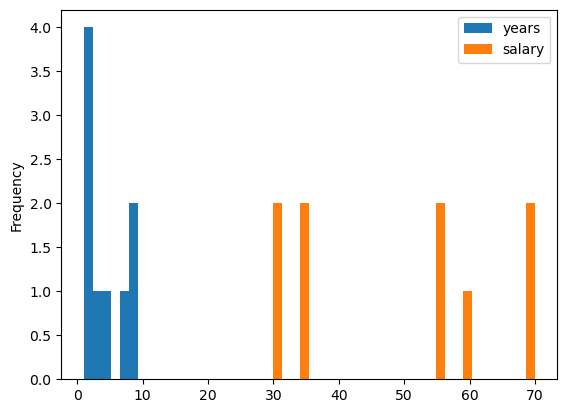

In [18]:
employee.plot.hist(bins=50)
# No veo ningun dato relevante.

#### What's the average salary in this company?

In [19]:
employee_salary_mean = employee.groupby('salary').mean()
employee_salary_mean

,years
salary,
30,2.0
35,2.5
55,2.5
60,7.0
70,8.0


In [20]:
employee.salary.mean()

48.888888888888886

#### What's the highest salary?

In [21]:
employee.salary.max()

70

#### What's the lowest salary?

In [22]:
employee.salary.min()

30

#### Who are the employees with the lowest salary?

In [23]:
employees_lowest_salary = employee [employee.salary == (employee.salary.min())]
employees_lowest_salary

,name,department,education,gender,title,years,salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [24]:
employee_david = employee [employee.name == 'David']
employee_david

,name,department,education,gender,title,years,salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [25]:
employee_david_salary = employee.loc[employee['name'] == 'David', ['name', 'salary']]

employee_david_salary

,name,salary
2,David,30


In [26]:
employee_david_salary = employee['salary'][employee.name == 'David']
employee_david_salary

2    30
Name: salary, dtype: int64

#### Print all the rows where job title is associate

In [27]:
employee_associate1 = employee [employee.title == 'associate']
employee_associate1

,name,department,education,gender,title,years,salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [28]:
employee_associate = employee.loc[employee['title'] == 'associate']
employee_associate

,name,department,education,gender,title,years,salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [29]:
employee.head(3)

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [30]:
employee[employee.index < 3]

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [31]:
employee_associate_55k = employee.loc[(employee['title'] == 'associate') & (employee['salary'] > 55)]
employee_associate_55k

,name,department,education,gender,title,years,salary
7,Pedro,IT,Phd,M,associate,7,60


In [32]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9 non-null      object
 1   department  9 non-null      object
 2   education   9 non-null      object
 3   gender      9 non-null      object
 4   title       9 non-null      object
 5   years       9 non-null      int64 
 6   salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [33]:
employee_years_employment = employee.groupby('years').mean()
employee_years_employment

,salary
years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [34]:
employee_mean_title = employee.groupby('title').mean()
employee_mean_title

,years,salary
title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

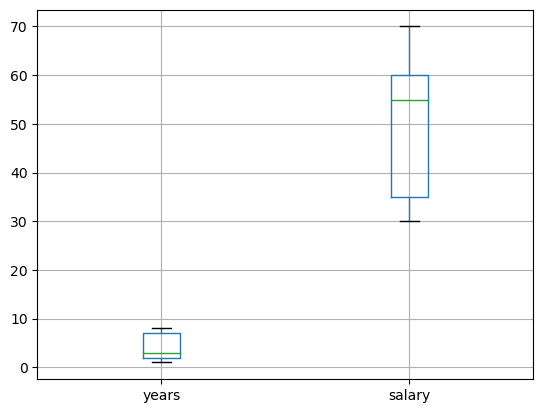

In [35]:
employee.boxplot();

In [36]:
q1_years = np.quantile(employee.years, 0.25)
q1_years

2.0

In [37]:
q1_salary = np.quantile(employee.salary, 0.25)
q1_salary

35.0

In [38]:
q3_years = np.quantile(employee.years, 0.75)
q3_years

7.0

In [39]:
q3_salary = np.quantile(employee.salary, 0.75)
q3_salary

60.0

#### Is the mean salary per gender different?

In [40]:
mean_salary_gender = employee.groupby('gender')['salary'].mean()
mean_salary_gender

gender
F    47.5
M    50.0
Name: salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [41]:
employee.columns

Index(['name', 'department', 'education', 'gender', 'title', 'years',
       'salary'],
      dtype='object')

In [42]:
department_info = employee.groupby('department').describe()
department_info

years                                                salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [43]:
# CHATGPT answer
department_dif_salary = employee.groupby('department')['salary'].apply(lambda x: x.max() - x.min())
department_dif_salary

department
HR       40
IT       40
Sales     0
Name: salary, dtype: int64

In [44]:
# My answer
maximo = employee.groupby('department')['salary'].max()
minimo = employee.groupby('department')['salary'].min()
department_dif_salary2 = maximo - minimo
department_dif_salary2

department
HR       40
IT       40
Sales     0
Name: salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [64]:
orders = pd.read_csv('Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [68]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unnamed:_0    397924 non-null  int64  
 1   invoiceno     397924 non-null  int64  
 2   stockcode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   description   397924 non-null  object 
 8   quantity      397924 non-null  int64  
 9   invoicedate   397924 non-null  object 
 10  unitprice     397924 non-null  float64
 11  customerid    397924 non-null  int64  
 12  country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [66]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [67]:
orders.columns=[e.lower().replace(' ', '_') for e in orders.columns]

####  What is the average Purchase Price?

In [69]:
purchase_price_mean = orders.amount_spent.mean()
purchase_price_mean

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [70]:
purchase_price_highest = orders.amount_spent.max()
purchase_price_highest

168469.6

In [71]:
purchase_price_lowest = orders.amount_spent.min()
purchase_price_lowest

0.0

#### Select all the customers we have in Spain

In [79]:
customer_spain = orders [orders.country=='Spain']
customer_spain.head(1)

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [76]:
len(customer_spain)

2485

#### Select all the customers who have bought more than 50 items ?

In [82]:
customer_quantity_50 = orders [orders.quantity > 50]
customer_quantity_50.head(1)

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.0


#### Select orders from Spain that are above 50 items

In [83]:
customer_quantity_50_spain = orders [(orders.country=='Spain') & (orders.quantity > 50)]
customer_quantity_50_spain.head(1)

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5


#### Select all free orders

In [84]:
free_orders = orders [orders.unitprice == 0]
free_orders.head(1)

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [87]:
lunch_bag_orders = orders[orders['description'].str.contains("lunch")]
lunch_bag_orders.head(1)

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
35,35,536370,22629,2010,12,3,8,spaceboy lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.8


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [88]:
lunch_bag_orders_2011 = orders[(orders['description'].str.contains("lunch")) & ((orders.year == 2011))]
lunch_bag_orders_2011.head(1)

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5


#### Show the frequency distribution of the amount spent in Spain.

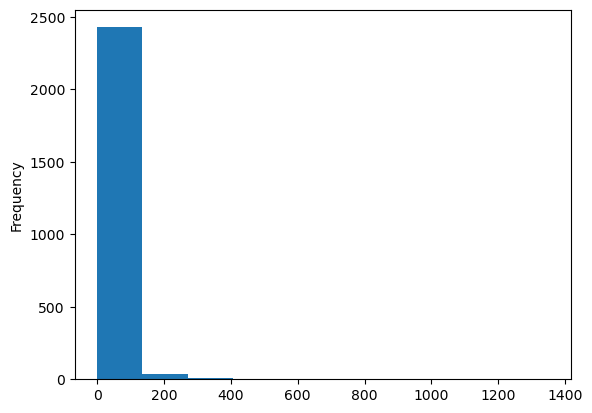

In [93]:
frequency_distribution_spain = orders[orders.country=='Spain']
frequency_distribution_spain.amount_spent.plot.hist(bins=10);

#### Select all orders made in the month of August

In [99]:
orders_august = orders[orders.month == 8]
orders_august.head(1)

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.2


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [107]:
orders_august_countries = orders_august.groupby('country')['quantity'].sum()
orders_august_countries

country
Australia           12570
Austria               790
Belgium              2069
Canada                 52
Channel Islands      2009
Denmark               338
EIRE                 9331
Finland               693
France               7958
Germany              9641
Iceland               277
Israel               3028
Italy                1147
Malta                 382
Netherlands         29876
Norway                636
Poland                186
Portugal             1026
Spain                1600
Sweden               1314
Switzerland          2998
United Kingdom     310832
Unspecified           185
Name: quantity, dtype: int64

#### What's the  average amount of money spent by country

In [111]:
mean_spent_country = orders_august.groupby('country')['amount_spent'].mean()
mean_spent_country

country
Australia          210.179439
Austria             17.228182
Belgium             18.319691
Canada              10.312000
Channel Islands     34.977000
Denmark             13.321875
EIRE                28.612782
Finland             22.565574
France              24.272337
Germany             24.177069
Iceland             26.586818
Israel              28.501813
Italy               20.957368
Malta               20.345455
Netherlands        144.027893
Norway              26.309221
Poland              23.635294
Portugal            29.790244
Spain               13.281389
Sweden              35.021500
Switzerland         18.613820
United Kingdom      21.573396
Unspecified         23.088261
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [129]:
expensive_price = orders.unitprice.max()
expensive_price

8142.75

In [135]:
expensive_item = orders[orders.unitprice == 8142.75]
expensive_item

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [137]:
average_spent = orders.groupby('year')['amount_spent'].mean()
average_spent

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64